In [1]:
import os
import cmdstanpy
from cmdstanpy import Model, StanFit, cmdstan_path
from cmdstanpy import Model, StanFit
import ujson as json

<h3> 1. Example: Running the model on Men's World Cup 2014 data</h3>

In [2]:
with open('2014_mwc_data/worldcup_2014.data.json', 'r') as fd:
    data_dict = json.load(fd)
data_dict.keys()

# stan_wc = Model(stan_file='../data/worldcup_gelman/worldcup_rep_ag.stan')
# stan_wc.compile()
# stan_wc

# worldcup_fit = stan_wc.sample(data=data_dict, chains=4)
# worldcup_fit.diagnose()
# worldcup_fit.summary()

dict_keys(['I', 'N', 'team_1', 'team_2', 'score_1', 'score_2', 'prior_score'])

In [38]:
data_dict

{'I': 32,
 'N': 64,
 'team_1': [1,
  20,
  1,
  28,
  28,
  23,
  4,
  5,
  4,
  32,
  32,
  11,
  7,
  15,
  7,
  27,
  27,
  22,
  8,
  9,
  8,
  17,
  17,
  26,
  18,
  6,
  18,
  30,
  30,
  13,
  2,
  29,
  2,
  24,
  24,
  12,
  3,
  21,
  3,
  19,
  19,
  14,
  10,
  16,
  10,
  25,
  25,
  31,
  1,
  7,
  11,
  26,
  6,
  3,
  2,
  10,
  1,
  6,
  11,
  2,
  1,
  11,
  1,
  3],
 'team_2': [23,
  28,
  20,
  23,
  1,
  20,
  11,
  32,
  5,
  11,
  4,
  5,
  22,
  27,
  15,
  22,
  7,
  15,
  26,
  17,
  9,
  26,
  8,
  9,
  13,
  30,
  6,
  13,
  18,
  6,
  12,
  24,
  29,
  12,
  2,
  29,
  14,
  19,
  21,
  14,
  3,
  21,
  31,
  25,
  16,
  31,
  10,
  16,
  5,
  8,
  20,
  22,
  24,
  31,
  18,
  19,
  7,
  3,
  26,
  10,
  3,
  2,
  11,
  2],
 'score_1': [3,
  1,
  0,
  0,
  1,
  1,
  1,
  3,
  0,
  2,
  0,
  2,
  3,
  2,
  2,
  0,
  1,
  2,
  1,
  1,
  2,
  0,
  0,
  0,
  2,
  3,
  2,
  1,
  0,
  0,
  2,
  0,
  1,
  1,
  2,
  3,
  4,
  1,
  2,
  2,
  0,
  2,
  2,
  1,
  1,

In [3]:
with open('2014_mwc_data/countries.data.json', 'r') as fd_country:
    country_dict = json.load(fd_country)
country_dict

{'countries': [[1, 'Bresil'],
  [2, 'Argentine'],
  [3, 'Allemagne'],
  [4, 'Espagne'],
  [5, 'Chili'],
  [6, 'France'],
  [7, 'Colombie'],
  [8, 'Uruguay'],
  [9, 'Angleterre'],
  [10, 'Belgique'],
  [11, 'Pays-Bas'],
  [12, 'Bosnie'],
  [13, 'Equateur'],
  [14, 'Portugal'],
  [15, "Coted'Ivoire"],
  [16, 'Russie'],
  [17, 'Italie'],
  [18, 'Suisse'],
  [19, 'Etats-Unis'],
  [20, 'Mexique'],
  [21, 'Ghana'],
  [22, 'Grece'],
  [23, 'Croatie'],
  [24, 'Nigeria'],
  [25, 'Coree'],
  [26, 'CostaRica'],
  [27, 'Japon'],
  [28, 'Cameroun'],
  [29, 'Iran'],
  [30, 'Honduras'],
  [31, 'Algerie'],
  [32, 'Australie']]}

<h3> 2. Women' World Cup Data 2019 </h3>

In [4]:
import pandas as pd
matches = pd.read_csv("538_data/wwc_matches.csv")
forecasts = pd.read_csv("538_data/wwc_forecasts.csv")
print(matches.columns, forecasts.columns)

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2', 'score1',
       'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object') Index(['forecast_timestamp', 'team', 'group', 'spi', 'global_o', 'global_d',
       'sim_wins', 'sim_ties', 'sim_losses', 'sim_goal_diff', 'goals_scored',
       'goals_against', 'group_1', 'group_2', 'group_3', 'group_4',
       'make_round_of_16', 'make_quarters', 'make_semis', 'make_final',
       'win_league', 'timestamp'],
      dtype='object')


In [5]:
#quarter-final info not yet filled in! Wikipedia to the rescue:[0,1,0,1]
matches.score1.iloc[[44, 45, 46, 47]] = [0,1,0,1]
matches.score2.iloc[[44, 45, 46, 47]] = [3,2,2,2]

/Users/nitya/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
len(matches.team2.unique()), len(matches.team1.unique()), len(forecasts.team.unique())

(24, 24, 24)

In [7]:
#spi is the soccer power index: i.e., the "abilities" of the teams
#Getting the scores before the tournament

prior_tournament = forecasts[forecasts['forecast_timestamp']=='2019-05-16 18:22:11 UTC']
countries = prior_tournament[['team', 'spi']].sort_values(by=['spi'], ascending=False)
wwc2019_country = countries['team'].values
print(wwc2019_country)

['USA' 'France' 'Germany' 'Australia' 'Netherlands' 'England' 'Japan'
 'Canada' 'Brazil' 'Sweden' 'Spain' 'New Zealand' 'Norway' 'China'
 'South Korea' 'Italy' 'Nigeria' 'Cameroon' 'South Africa' 'Jamaica'
 'Scotland' 'Thailand' 'Chile' 'Argentina']


In [8]:
#Creating a dictionary and the 'reverse' dictionary which might be useful later

spi_dict = dict(zip(wwc2019_country, list(range(1, len(wwc2019_country)+1))))
spi_dict_r = dict(zip(list(range(1, len(wwc2019_country)+1)), wwc2019_country))

In [9]:
import numpy as np
mean = np.mean(countries['spi'])
std = np.std(countries['spi'])
countries['prior_score'] = [(x - mean)/std for x in countries['spi']]

In [10]:
matches['team1'] = matches['team1'].apply(lambda x: x.split('Women')[0].rstrip())
matches['team2'] = matches['team2'].apply(lambda x: x.split('Women')[0].rstrip())

<h3> 3. Data input for CmdStanPy/Stan </h3>

Data input needs to be in a dictionary format;
Keys in the dictionary are the names of the variables in the data block of the stan model;

In [11]:
N = len(matches)
I = len(wwc2019_country)
mydict = dict({'I': I,
               'N': N,
                'team_1': matches['team1'].values,
               'team_2': matches['team2'].values,
               'score_1': matches['score1'].values,
               'score_2': matches['score2'].values,
              'prior_score': countries['prior_score'].values})

In [12]:
#Replace team names by their rankings;

mydict['team_1'] = [spi_dict.get(x) for x in mydict['team_1']]
mydict['team_2'] = [spi_dict.get(x) for x in mydict['team_2']]

In [13]:
stan_wc = Model(stan_file='worldcup_rep_ag.stan')
stan_wc.compile()
stan_wc

INFO:cmdstanpy:compiling c++
INFO:cmdstanpy:compiled model file: /Users/nitya/Work/test_tutorial/worldcup_rep_ag


Model(name=worldcup_rep_ag,  stan_file="worldcup_rep_ag.stan", exe_file="/Users/nitya/Work/test_tutorial/worldcup_rep_ag")

In [14]:
worldcup_fit = stan_wc.sample(data=mydict, chains=4)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


In [15]:
worldcup_fit.diagnose()


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


'Processing csv files: /var/folders/p4/76cck04j075g95k8wbfvw1ch0000gn/T/tmpdkuou6li/stan-worldcup_rep_ag-draws-1-u9e7gevg.csv, /var/folders/p4/76cck04j075g95k8wbfvw1ch0000gn/T/tmpdkuou6li/stan-worldcup_rep_ag-draws-2-cjewecu3.csv, /var/folders/p4/76cck04j075g95k8wbfvw1ch0000gn/T/tmpdkuou6li/stan-worldcup_rep_ag-draws-3-5i3a3t50.csv, /var/folders/p4/76cck04j075g95k8wbfvw1ch0000gn/T/tmpdkuou6li/stan-worldcup_rep_ag-draws-4-7dcyfa14.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory for all transitions.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.'

In [21]:
worldcup_fit.summary().to_csv('0_worldcupfit.csv')

In [68]:
df.round(decimals = 2)

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-52.15,0.31,6.85,-64.58,-51.50,-41.67,486.37,308.29,1.01
beta,0.92,0.01,0.26,0.49,0.93,1.33,1837.69,1164.84,1.00
alpha[1],0.96,0.01,0.68,-0.15,0.98,2.07,2462.06,1560.60,1.00
alpha[2],0.33,0.01,0.64,-0.72,0.33,1.38,3749.10,2376.40,1.00
alpha[3],0.41,0.01,0.65,-0.66,0.42,1.46,3445.80,2184.15,1.00
alpha[4],-0.19,0.01,0.67,-1.25,-0.20,0.92,3961.88,2511.28,1.00
alpha[5],0.48,0.01,0.64,-0.54,0.48,1.53,4250.95,2694.50,1.00
alpha[6],0.59,0.01,0.70,-0.58,0.63,1.69,2942.34,1865.03,1.00
alpha[7],-0.72,0.01,0.73,-1.95,-0.69,0.40,2728.91,1729.74,1.00


In [74]:
df1 = df.transpose()

In [75]:
df1['y']

name,lp__,beta,alpha[1],alpha[2],alpha[3],alpha[4],alpha[5],alpha[6],alpha[7],alpha[8],...,y_rep[39],y_rep[40],y_rep[41],y_rep[42],y_rep[43],y_rep[44],y_rep[45],y_rep[46],y_rep[47],y_rep[48]
Mean,-52.15100,0.922383,0.963558,0.328376,0.406650,-0.189760,0.480990,0.593381,-0.719431,-0.177360,...,2.060680,0.691858,-1.620880,0.376463,0.672109,1.104200,-1.164840,-0.766351,-0.697931,0.259103
MCSE,0.31063,0.006066,0.013709,0.010391,0.011134,0.010610,0.009782,0.012968,0.013885,0.010942,...,0.026630,0.024887,0.028672,0.027899,0.027592,0.024988,0.031123,0.025876,0.024803,0.024879
StdDev,6.85055,0.260020,0.680220,0.636226,0.653550,0.667848,0.637804,0.703437,0.725327,0.668494,...,1.636900,1.607630,1.667280,1.635140,1.686390,1.638320,1.701780,1.632310,1.630230,1.619230
5%,-64.57580,0.489503,-0.151250,-0.722396,-0.660449,-1.251970,-0.537032,-0.577718,-1.951610,-1.258820,...,-0.622335,-1.776610,-4.296170,-2.229770,-1.995270,-1.500190,-3.923840,-3.258120,-3.398420,-2.346870
50%,-51.50400,0.927248,0.977918,0.332363,0.422756,-0.201339,0.484071,0.625232,-0.691797,-0.186931,...,2.084000,0.642619,-1.632240,0.394672,0.688695,1.086920,-1.178020,-0.778251,-0.707402,0.284314
95%,-41.67130,1.333430,2.072000,1.376620,1.458830,0.919911,1.528700,1.694750,0.403401,0.926519,...,4.700990,3.266150,1.039970,2.944900,3.368680,3.647100,1.644540,1.887760,1.866120,2.839490
N_Eff,486.36600,1837.690000,2462.060000,3749.100000,3445.800000,3961.880000,4250.950000,2942.340000,2728.910000,3732.410000,...,3778.290000,4172.770000,3381.430000,3435.100000,3735.520000,4298.620000,2989.900000,3979.190000,4320.020000,4235.870000
N_Eff/s,308.28800,1164.840000,1560.600000,2376.400000,2184.150000,2511.280000,2694.500000,1865.030000,1729.740000,2365.820000,...,2394.900000,2644.950000,2143.350000,2177.370000,2367.790000,2724.720000,1895.180000,2522.250000,2738.280000,2684.940000
R_hat,1.00554,1.003140,1.000010,0.999461,1.000120,1.000010,1.000150,1.002830,1.002870,0.999240,...,1.000220,1.000400,1.000410,0.999434,1.000560,0.999509,1.000770,1.000000,0.999662,0.999884


In [79]:
ability_filter = [col for col in df1 if col.startswith('ability')]
yrep_filter = [col for col in df1 if col.startswith('y_rep')]

In [82]:
wwc2019_country

array(['USA', 'France', 'Germany', 'Australia', 'Netherlands', 'England',
       'Japan', 'Canada', 'Brazil', 'Sweden', 'Spain', 'New Zealand',
       'Norway', 'China', 'South Korea', 'Italy', 'Nigeria', 'Cameroon',
       'South Africa', 'Jamaica', 'Scotland', 'Thailand', 'Chile',
       'Argentina'], dtype=object)

In [80]:
#Team Differentials
td = df1[yrep_filter]

In [83]:
abilities = df1[ability_filter]

In [84]:
abilities

name,ability[1],ability[2],ability[3],ability[4],ability[5],ability[6],ability[7],ability[8],ability[9],ability[10],...,ability[15],ability[16],ability[17],ability[18],ability[19],ability[20],ability[21],ability[22],ability[23],ability[24]
Mean,1.994800,1.275740,1.287630,0.670626,1.279810,1.420740,0.184613,0.645899,0.604688,1.020570,...,-1.072180,0.566601,-0.625152,-0.624121,-1.407110,-2.112860,-0.816155,-2.578340,-1.122860,-0.901867
MCSE,0.014220,0.008256,0.008740,0.010213,0.008643,0.013731,0.010425,0.009563,0.009368,0.010367,...,0.024025,0.012911,0.010810,0.009239,0.012109,0.017568,0.019045,0.016257,0.011858,0.030315
StdDev,0.625347,0.554369,0.555147,0.600711,0.541099,0.617453,0.600061,0.587232,0.583585,0.553096,...,0.800672,0.602789,0.624128,0.587146,0.652461,0.756133,0.749204,0.792616,0.647297,0.910248
5%,1.011290,0.347736,0.374338,-0.334574,0.419104,0.472416,-0.803384,-0.323124,-0.380802,0.126578,...,-2.423570,-0.394117,-1.669680,-1.590610,-2.526770,-3.394060,-1.989070,-3.920940,-2.136450,-2.380950
50%,1.985870,1.271560,1.284640,0.696670,1.276710,1.404660,0.202539,0.653315,0.623196,1.016400,...,-1.049680,0.557628,-0.604187,-0.637861,-1.377910,-2.083630,-0.842311,-2.546460,-1.134830,-0.909660
95%,3.065170,2.188900,2.209290,1.639760,2.174160,2.471070,1.145870,1.616760,1.554170,1.941430,...,0.213251,1.560670,0.360030,0.341114,-0.406773,-0.912442,0.468000,-1.347760,-0.042232,0.630354
N_Eff,1933.950000,4509.220000,4034.800000,3459.710000,3919.330000,2021.990000,3312.980000,3770.480000,3880.910000,2846.190000,...,1110.610000,2179.650000,3333.550000,4039.150000,2903.340000,1852.390000,1547.510000,2377.080000,2979.530000,901.601000
N_Eff/s,1225.850000,2858.210000,2557.490000,2192.970000,2484.310000,1281.660000,2099.970000,2389.950000,2459.950000,1804.090000,...,703.972000,1381.590000,2113.000000,2560.250000,1840.310000,1174.160000,980.907000,1506.740000,1888.600000,571.488000
R_hat,1.000470,0.999648,1.000100,0.999574,1.000150,1.003210,0.999968,1.000230,0.999190,0.999491,...,1.003170,1.001240,0.999659,1.000370,0.999700,1.000300,1.004610,1.000190,1.000330,1.003670


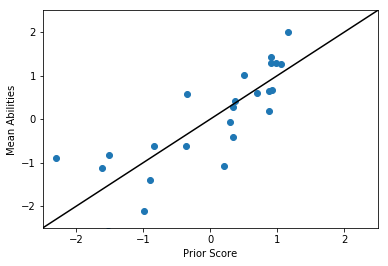

In [70]:
import matplotlib.pyplot as plt
ab = df[28:52]['Mean'].values


plt.scatter(countries['prior_score'], ab)
plt.xlabel('Prior Score')
plt.ylabel('Mean Abilities')
plt.plot([-3.5,0,3.5], [-3.5,0,3.5], color = 'k')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.show()

In [69]:
team_differentials = df[52:]['Mean'].values
team_differentials

array([ 2.39395e+00,  1.39671e+00,  1.81163e+00,  8.91007e-01,
        9.01304e-02,  2.70243e+00,  2.19770e+00, -1.12313e+00,
        1.25516e+00, -1.66372e+00, -2.18275e+00,  4.55807e+00,
        4.52065e-01,  8.84504e-01,  9.36624e-01,  5.10569e-02,
       -1.35004e+00,  1.03192e+00, -2.61702e+00,  2.32149e+00,
        1.90427e+00,  1.04484e+00,  3.60766e+00,  3.14216e+00,
       -5.23690e-01, -2.69205e+00, -1.89830e+00, -1.34207e+00,
        4.07508e-03, -2.77511e+00,  1.17749e-01, -1.24895e+00,
       -2.17712e-01,  6.51137e-01, -9.87807e-01, -1.46116e+00,
        1.89035e+00, -3.81266e-01,  2.06068e+00,  6.91858e-01,
       -1.62088e+00,  3.76463e-01,  6.72109e-01,  1.10420e+00,
       -1.16484e+00, -7.66351e-01, -6.97931e-01,  2.59103e-01])

In [72]:
score_differentials = [matches['score1'][i]-matches['score2'][i]  for i in range(len(matches))]

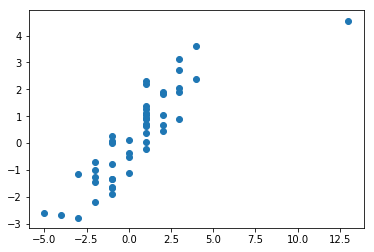

In [73]:
plt.scatter(score_differentials,team_differentials)
plt.show()

<h3> 4. Interpreting the model fit </h3>


We're replaying all the games and predicting 